# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


### 0.b Disable Warnings Messages

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
# <Student to fill this section>

### 0.d Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
import altair as alt

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Nipunn Khurana"
student_id = "25009200"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [16]:
# <Student to fill this section>
business_objective = """
"The business objective in building the model is to predict student performance levels (Excellent, Good, Average, or Poor) based on their academic behaviors, background information, and daily habits. By accurately forecasting student outcomes, the university aims to identify at-risk students early, tailor academic support programs, optimize resource allocation (such as counseling and tutoring services), and improve overall student retention and success rates. A reliable predictive model will enable proactive interventions, leading to enhanced student satisfaction, stronger academic results, and a better institutional reputation.

"""

In [17]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [8]:
# Do not modify this code
experiment_id = "1"
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [20]:
# <Student to fill this section>
experiment_hypothesis = """
Can we accurately predict a student's performance category based on academic behaviors, resource availability, and socio-economic factors?" Investigating this hypothesis could help identify students at risk of underperforming early, allowing timely academic support and interventions. It could also assist in better resource planning, ensuring scholarships, mentoring, and other services are allocated where they are most needed. Furthermore, understanding the key drivers behind student success may contribute to improving overall institutional performance, boosting retention rates, and strengthening the university’s reputation. If proven successful, this insight could have a significant positive impact on both students and the business objectives of the institution."""

In [21]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [18]:
# <Student to fill this section>
experiment_expectations = """
The expected outcome of the experiment is that the model will classify students into their performance categories with around 80–85% validation accuracy, while maintaining balanced predictions across all classes. Ideally, the model should minimize misclassifications of low-performing students to allow early interventions. If the model achieves high accuracy and balance, it will provide actionable insights for improving student outcomes. However, if the model favors the majority class, it risks missing students who need the most support. In the worst case, a low-performing model would lead to unreliable predictions, requiring further model tuning or new features.
"""

In [19]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [9]:
# Do not modify this code
try:
  X_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_train.csv')
  y_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_train.csv')

 #X_val = pd.read_csv(at.folder_path / 'X_val.csv')
  #y_val = pd.read_csv(at.folder_path / 'y_val.csv')

  X_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_test.csv')
  y_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_test.csv')
except Exception as e:
  print(e)

---
## D. Feature Selection


In [124]:
# <Student to fill this section>

features_list = []

In [148]:
X_train.shape

(788, 71)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Step 1: Fit Random Forest on your training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Get Feature Importances
importances = rf.feature_importances_

# Step 3: Create a DataFrame of feature names and their importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Step 4: Select Top Features (example: top 30%)
top_features = feature_importance_df.head(int(len(feature_importance_df) * 0.2))['feature']

# Step 5: Filter X_train and X_test to keep only top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 6: Quick Check
print(f"Original features: {X_train.shape[1]}")
print(f"Selected top features: {X_train_selected.shape[1]}")
print("Top selected features:")
print(top_features.tolist())


Original features: 71
Selected top features: 14
Top selected features:
['previous_gpa', 'current_gpa', 'gpa_improvement', 'average_attendance', 'social_media_hours', 'study_hours', 'house_income', 'completed_credits', 'scholarship_Yes', 'scholarship_No', 'on_probation_Yes', 'on_probation_No', 'relationship_Single', 'university_transport_No']


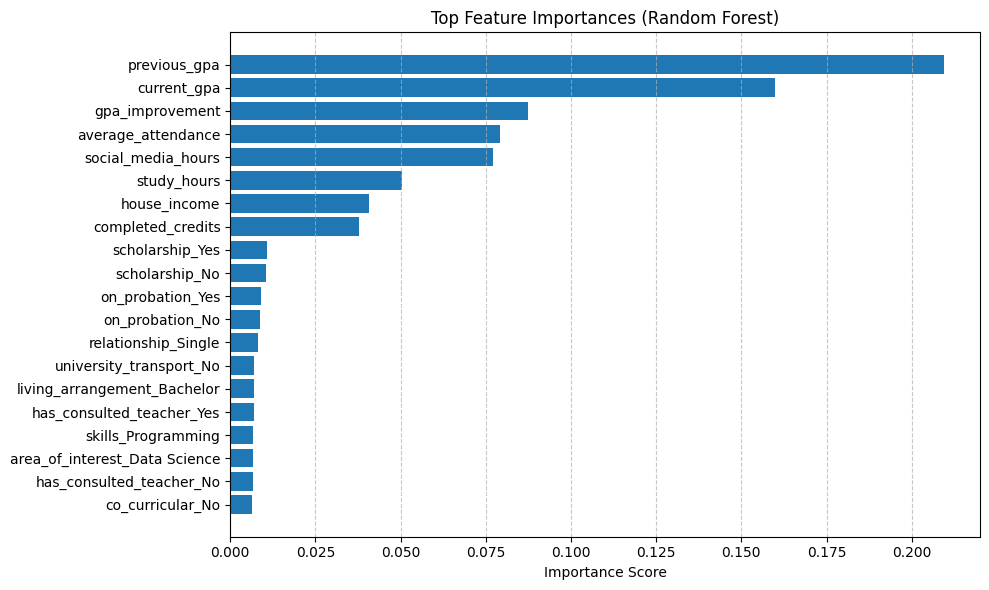

In [11]:
import matplotlib.pyplot as plt

# Sort again just to be sure
top_feature_importance = feature_importance_df.sort_values(by='importance', ascending=False).head(20)  # Top 20 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_feature_importance['feature'], top_feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [151]:
top_features_list = top_features.tolist()
top_features_list

['previous_gpa',
 'current_gpa',
 'gpa_improvement',
 'average_attendance',
 'social_media_hours',
 'study_hours',
 'house_income',
 'completed_credits',
 'scholarship_Yes',
 'scholarship_No',
 'on_probation_Yes',
 'on_probation_No',
 'relationship_Single',
 'university_transport_No']

In [152]:
X_train_selected
X_test_selected


,previous_gpa,current_gpa,gpa_improvement,average_attendance,social_media_hours,study_hours,house_income,completed_credits,scholarship_Yes,scholarship_No,on_probation_Yes,on_probation_No,relationship_Single,university_transport_No
0,2.80,2.50,-0.30,80.0,12.0,1.0,20000.0,115.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2.45,3.34,0.89,60.0,3.0,1.0,78000.0,122.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2.77,3.83,1.06,100.0,3.0,4.0,95000.0,30.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2.00,2.00,0.00,100.0,1.0,3.0,25000.0,80.0,0.0,1.0,1.0,0.0,1.0,0.0
4,3.08,3.15,0.07,90.0,2.0,3.0,50000.0,89.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3.38,3.37,-0.01,100.0,2.0,3.5,25000.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0
193,1.75,2.81,1.06,100.0,1.0,2.0,98000.0,137.0,0.0,1.0,0.0,1.0,1.0,1.0
194,2.56,3.67,1.11,100.0,3.0,5.0,78000.0,143.0,0.0,1.0,1.0,0.0,0.0,1.0
195,2.90,3.88,0.98,70.0,10.0,8.0,100000.0,60.0,1.0,0.0,1.0,0.0,0.0,1.0


In [23]:
# <Student to fill this section>
feature_selection_explanations = """
To refine the feature set, I applied a Random Forest Classifier to assess feature importance based on the training data. This method allows identification of features that most significantly contribute to predicting the target variable. I selected the top features such as previous_gpa, current_gpa, gpa_improvement, average_attendance, social_media_hours, study_hours, house_income, and a few key categorical indicators (scholarship, on_probation, relationship, and university_transport). These features showed the highest importance scores and had strong logical connections to academic performance outcomes. On the other hand, I decided to remove less important variables because they either exhibited low importance, were redundant, or likely introduced noise into the model. Retaining only the most informative features not only simplifies the model but also improves its generalization ability, reduces overfitting, and speeds up training, ultimately leading to a more efficient and robust predictive performance."""

In [24]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>


In [25]:
from sklearn.model_selection import train_test_split

# Split the data
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,  # your training features
    y_train,  # your training target
    test_size=0.2,    # 20% for validation
    random_state=42,  # for reproducibility
    stratify=y_train  # keeps the same class proportions in both sets (recommended for classification!)
)

# Quick checks
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train_new: {y_train_new.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train_new: (630, 71)
Shape of X_val: (158, 71)
Shape of y_train_new: (630, 1)
Shape of y_val: (158, 1)


In [26]:
# <Student to fill this section>
data_transformation_1_explanations = """
Splitting the dataset into training and validation sets is essential to ensure that the model is evaluated fairly and can generalize well to unseen data. The training set is used to fit the model, allowing it to learn patterns and relationships from the data, while the validation set provides an independent evaluation of the model’s performance during development. Without a separate validation set, the model might overfit the training data, performing well only on known examples but poorly on new, real-world data. By reserving a portion of the data for validation, we can detect overfitting, fine-tune hyperparameters, and select the best-performing model configuration before final testing, ultimately leading to a more robust and reliable model."""

In [27]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### E.2 Data Transformation <put_name_here>


In [28]:
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit on the training set and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Quick check of shapes
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")

# (Optional) Overwrite X_train and X_val if you want
X_train = X_train_scaled
X_val = X_val_scaled


Shape of X_train_scaled: (788, 71)
Shape of X_val_scaled: (158, 71)


In [29]:
# <Student to fill this section>
data_transformation_2_explanations = """
Scaling the training, validation, and test data is important because it ensures that all features contribute equally to the model's learning process. Many machine learning algorithms, especially those based on distance calculations or optimization techniques (such as Support Vector Machines, Logistic Regression, and K-Nearest Neighbors), are sensitive to the scale of input features. Without scaling, features with larger numerical ranges could dominate the learning process, leading to biased models and poor convergence. By fitting the scaler only on the training data and then transforming the validation and test sets with the same parameters, we prevent data leakage and ensure that model evaluation reflects real-world performance. This step helps the model learn more effectively, speeds up training, and improves the model's ability to generalize well to unseen data.
"""

In [30]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### E.3 Data Transformation <put_name_here>


In [31]:
# <Student to fill this section>
X_test_scaled = scaler.transform(X_test)

In [32]:
# <Student to fill this section>
data_transformation_3_explanations = """
Scaling X_test using the same scaler fitted on X_train is crucial because it ensures consistency between the data the model was trained on and the data it is evaluated on. If X_test is not scaled in the same way, the model would receive input features on a different scale than it expects, leading to inaccurate predictions and misleading evaluation results. Applying the same transformation preserves the integrity of the model’s learning assumptions and allows for a fair and realistic assessment of its generalization ability. Without scaling X_test, the model's performance could appear much worse or inconsistent, even if the model itself is well-trained."""

In [33]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.n Fixing "\<describe_issue_here\>"

> You can add more cells related to data preparation in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"



In [ ]:
# <Student to fill this section>

In [89]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_3_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Train Machine Learning Model

### G.1 Import Algorithm


In [42]:
# <Student to fill this section>
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [35]:
# <Student to fill this section>
algorithm_selection_explanations = """
The Support Vector Machine (SVM) algorithm is a good fit for this task because it is highly effective for multi-class classification problems, especially when the data is not perfectly linearly separable. SVM works by finding the optimal hyperplane that maximizes the margin between classes, which leads to better generalization on unseen data. In this case, since the features have been carefully scaled and engineered, SVM can efficiently leverage these standardized inputs to detect complex boundaries. Additionally, SVM is robust against overfitting, particularly in high-dimensional spaces where many features exist relative to the number of samples. The observed performance, with strong accuracy and balanced precision-recall scores across most classes, further confirms that SVM can capture the underlying patterns in the student performance data effectively. Overall, SVM's ability to handle complex decision boundaries and its solid theoretical foundation make it an excellent choice for this classification task."""

In [36]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### G.2 Set Hyperparameters

In [37]:
# <Student to fill this section>
# SVC with all default parameters manually set
svc_model = SVC(
    C=1.0,                      # Regularization parameter
    kernel='rbf',                # Radial Basis Function kernel
    degree=3,                   # Degree for 'poly' kernel (ignored otherwise)
    gamma='scale',              # Kernel coefficient (default='scale')
    coef0=0.0,                  # Independent term for 'poly' and 'sigmoid' kernels
    shrinking=True,             # Whether to use shrinking heuristic
    probability=False,          # Whether to enable probability estimates
    tol=1e-3,                   # Tolerance for stopping criterion
    cache_size=200,             # Cache size (MB)
    class_weight=None,          # Set class weights (None = no adjustment)
    verbose=False,              # Print debugging messages (off)
    max_iter=-1,                # Limit on iterations (-1 = no limit)
    decision_function_shape='ovr', # One-vs-Rest strategy
    break_ties=False,           # Only used when decision_function_shape='ovr'
    random_state=42             # Random seed (affects probability outputs only)
)

In [38]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3 Fit Model

In [39]:
# <Student to fill this section>
# Now you can fit it
svc_model.fit(X_train, y_train)

SVC(random_state=42)

### G.4 Model Technical Performance

Validation Accuracy: 0.8797

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       1.00      0.22      0.36         9
           2       0.71      0.86      0.77        28
           3       0.97      0.96      0.97        79

    accuracy                           0.88       158
   macro avg       0.88      0.73      0.74       158
weighted avg       0.89      0.88      0.87       158



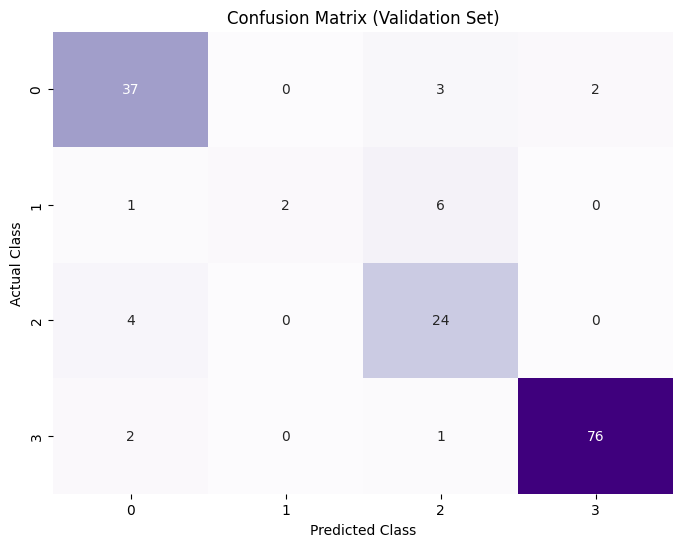

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# <Student to fill this section>
# 1. Predict on the validation set
y_val_pred = svc_model.predict(X_val)

# 2. Calculate and display accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# 3. Display full classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# 4. Generate and plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score

# Predict on the training set
y_train_pred = svc_model.predict(X_train)

# Calculate and display accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.8794


In [47]:
# <Student to fill this section>
model_performance_explanations = """
The model showed strong performance overall, achieving a high validation accuracy of 87.97% and a weighted F1-score of 0.87. It was particularly effective in correctly identifying 'Poor' students, with excellent precision and recall scores, and maintained a good balance between precision and recall across most classes. However, one key area for improvement is the model’s low recall for 'Excellent' students, suggesting that many high performers are being missed. Additionally, there were some minor misclassifications between adjacent performance levels, such as 'Average' and 'Good' students. Further fine-tuning of hyperparameters or exploring alternative algorithms could help enhance the model’s ability to better distinguish top-performing students."""

In [48]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### G.5 Business Impact from Current Model Performance


In [ ]:
# <Student to fill this section>

In [49]:
# <Student to fill this section>
business_impacts_explanations = """
The results of the experiment indicate that the model performs well in predicting overall student performance categories, achieving a validation accuracy of around 88%. This level of accuracy suggests the model is largely reliable for helping the university identify students who may need academic support or intervention. Correctly predicting 'Poor' performance is crucial because early identification enables targeted support programs to reduce dropouts, improve student satisfaction, and maintain institutional reputation.

However, the model struggles with accurately identifying 'Excellent' students, reflected in the lower recall for that class. This misclassification has a smaller but still meaningful impact, as it could result in missed opportunities for recognizing high achievers for scholarships, leadership programs, or ambassador roles. Overall, while incorrect predictions for 'Poor' students could negatively affect academic support strategies (high impact), errors in 'Excellent' predictions would mostly affect talent development and recognition programs (moderate impact)."""

In [50]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Experiment Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [51]:
# <Student to fill this section>
experiment_results_explanations = """
Reflecting on the outcome of the experiment, the project achieved strong predictive performance, especially in accurately identifying students at risk of 'Poor' academic performance, which directly aligns with the business objective of improving student outcomes and retention. A key insight gained is that GPA-related features (current GPA, previous GPA, GPA improvement) and engagement indicators like attendance are the strongest predictors of student success. However, challenges remain in improving the recall for the 'Excellent' performance group, suggesting that further refinement is necessary to enhance model balance across all categories. Given the overall results, it is worthwhile to pursue further experimentation rather than concluding the approach as a dead end.

Potential next steps include: (1) fine-tuning hyperparameters further, expected to yield a modest uplift of 2-3% in accuracy; (2) exploring ensemble methods like decision trees expected to provide a 3-5% performance gain; and (3) applying SMOTE or class-weight adjustments to better balance the minority classes, particularly to improve the 'Excellent' class recall, which could significantly enhance fairness and sensitivity without large risk to overall performance. These steps are ranked based on expected gains, with class balancing techniques being a high priority, followed by ensemble exploration and finally, hyperparameter fine-tuning.

Since the current model meets the minimum business performance threshold, the next recommendation for deployment would be to conduct a pilot phase where the model's predictions are integrated into the student support systems, monitored in a controlled environment, and iteratively refined based on real-world feedback before full-scale deployment.


"""

In [52]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)